<a href="https://colab.research.google.com/github/ronald-hk-chung/fastai_practice/blob/main/fastai_04_summary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural network from first principal

## 1. Setting up notebook

In [1]:
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 54.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 88.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 87.9 MB/s eta 0:00:00
Mounted at /content/gdrive


In [2]:
from fastai.vision.all import *
from fastbook import *

In [3]:
# To show data folder hidden in /.fastai
!curl -s https://course19.fast.ai/setup/colab | bash

Updating fastai...
Done.


## 2. Demonstration of Stochastic Gradient Descent (SGD)

1. *Initialize* the weights.
1. For each X or image, use these weights to *predict* to true label
1. Based on these predictions, calculate how good the model is (its *loss*).
1. Calculate the *gradient*, which measures for each weight, how changing that weight would change the loss
1. *Step* (that is, change) all the weights based on that calculation.
1. Go back to the step 2, and *repeat* the process.
1. Iterate until you decide to *stop* the training process (for instance, because the model is good enough or you don't want to wait any longer).

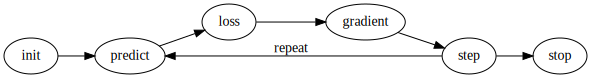

In [4]:
gv('''
init->predict->loss->gradient->step->stop
step->predict[label=repeat]
''')

### Example on a Scalar function
$$
y = w_1 \times X^2 + w_2 \times X + b + noise
$$

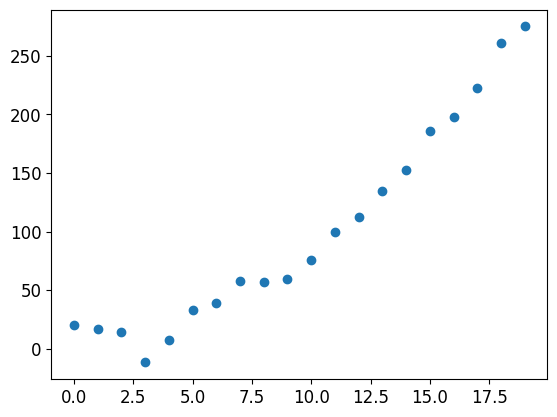

In [5]:
# Define input and target
X = torch.arange(0, 20).float()
w1, w2, b = 0.75, 0.5, 1
y = w1*(X**2) + w2*X + b + torch.randn(20)*10
plt.scatter(X, y);

params: tensor([-0.7658, -0.7506,  1.3525], requires_grad=True)


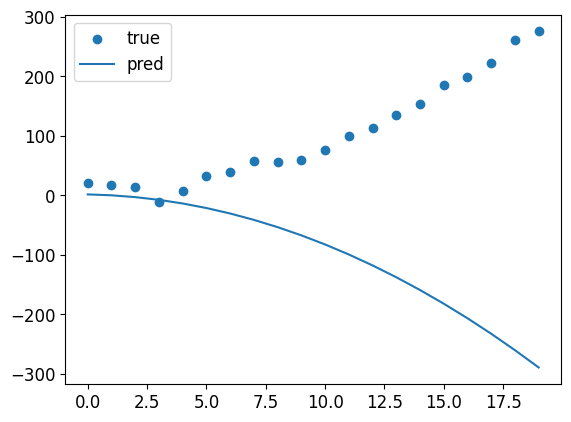

In [6]:
# Define function f to predict
def f(X, params):
  w1, w2, b = params
  return w1*X**2 + w2*X + b

# define random params for initial predict
params = torch.randn(3).requires_grad_()
orig_params = params.clone()

print(f'params: {params}')
preds = f(X, params)

# Plot out the prediction vs. true label
fig, ax = plt.subplots()
ax.scatter(X, y, label='true')
ax.plot(X, preds.detach().cpu(), label='pred')
ax.legend();

In [7]:
# define loss function (MSE - Mean Squared Error)
def mse(preds, targets):
  return ((preds - targets)**2).mean()

Original Loss: 71675.6171875
params: tensor([-0.7658, -0.7506,  1.3525])
params grad: tensor([-89738.0625,  -5782.7808,   -401.7920])
New loss: 13654.5732421875


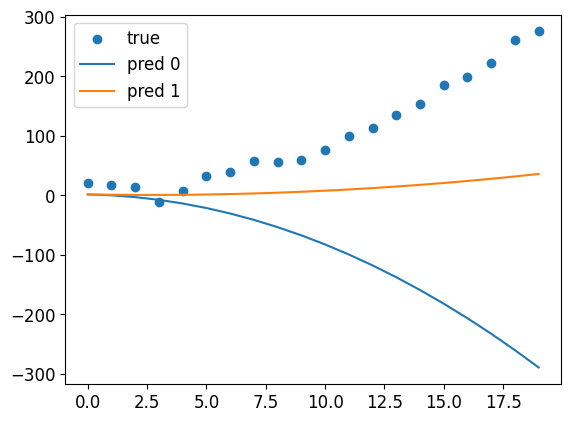

In [8]:
# Perform 1 cycle of training

#Plot out the prediction vs. true label
fig, ax = plt.subplots()
ax.scatter(X, y, label='true')
ax.plot(preds.detach().cpu(), label='pred 0')

# Calculate Loss
loss = mse(preds, y)
print(f'Original Loss: {loss.item()}')

# Calculate gradients
loss.backward()
params.grad
print(f'params: {params.data}')
print(f'params grad: {params.grad}')

# Gradient descent
lr = 1e-5
params.data -= lr * params.grad
params.grad = None

# Make new prediction
preds = f(X, params)
print(f'New loss: {mse(preds, y)}')
ax.plot(preds.detach().cpu(), label='pred 1')
ax.legend();

In [9]:
# define a training loop
def train(params, y, lr=1e-5):
  preds = f(X, params)
  loss = mse(preds, y)
  loss.backward()
  params.data -= lr * params.grad
  params.grad = None
  print(f'MSE Loss: {loss} | Params: {params.data} | Grad: {params.grad}')
  return preds, mse(preds, y)

In [10]:
# Loop through 10 epoch for results
result=[]
# reinstate orig_params for demo
params = orig_params.detach().requires_grad_()

for epoch in range(10):
  preds, mse_loss= train(params, y, lr=1e-5)
  result.append(preds.detach().cpu().numpy())

MSE Loss: 71675.6171875 | Params: tensor([ 0.1315, -0.6928,  1.3566]) | Grad: None
MSE Loss: 13654.5732421875 | Params: tensor([ 0.5219, -0.6675,  1.3584]) | Grad: None
MSE Loss: 2675.208984375 | Params: tensor([ 0.6917, -0.6564,  1.3592]) | Grad: None
MSE Loss: 597.5724487304688 | Params: tensor([ 0.7656, -0.6514,  1.3596]) | Grad: None
MSE Loss: 204.4152069091797 | Params: tensor([ 0.7977, -0.6491,  1.3598]) | Grad: None
MSE Loss: 130.01284790039062 | Params: tensor([ 0.8116, -0.6480,  1.3599]) | Grad: None
MSE Loss: 115.92866516113281 | Params: tensor([ 0.8177, -0.6473,  1.3600]) | Grad: None
MSE Loss: 113.258544921875 | Params: tensor([ 0.8203, -0.6469,  1.3601]) | Grad: None
MSE Loss: 112.74824523925781 | Params: tensor([ 0.8215, -0.6466,  1.3602]) | Grad: None
MSE Loss: 112.64671325683594 | Params: tensor([ 0.8220, -0.6464,  1.3603]) | Grad: None


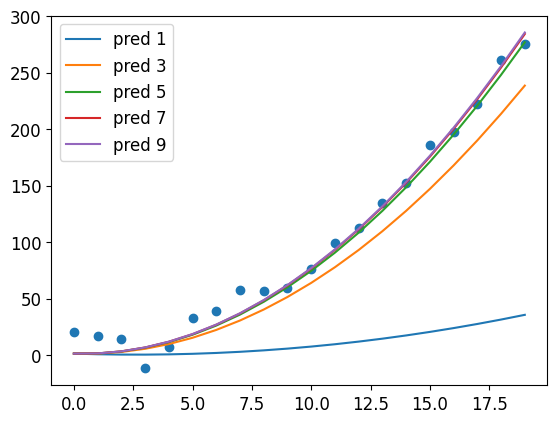

In [11]:
for i in range(1, 10, 2):
  plt.plot(result[i], label=f'pred {i}')
plt.scatter(X, y)
plt.legend();

## Demonstration of SGD on MNIST

### Getting the data - from torchvision.datasets

In [430]:
import torchvision
import torch

tfms = torchvision.transforms.ToTensor()

# Getting the data using datasets
train_data = torchvision.datasets.MNIST(root='data',
                                        train=True,
                                        download=True,
                                        transform=tfms,
                                        target_transform=None)

valid_data = torchvision.datasets.MNIST(root='data',
                                       train=False,
                                       download=True,
                                       transform=tfms,
                                       target_transform=None)

# path = untar_data(URLs.MNIST_SAMPLE)

# Create Raw train_loader and test_loader
train_loader = DataLoader(dataset=train_data,
                          bs=32,
                          shuffle=True,
                          num_workers=0,
                          pin_memory=True)

valid_loader = DataLoader(dataset=valid_data,
                          bs=32,
                          shuffle=False,
                          num_workers=0,
                          pin_memory=True)

# DataLoaders for fastai framework
dls = DataLoaders(train_loader, valid_loader)

In [431]:
# Show one batch
train_feature_batch, train_label_batch = first(train_loader)
train_feature_batch.shape, train_label_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

## Work Flow
```python
for x,y in dl:
    pred = model(x)
    loss = loss_func(pred, y)
    loss.backward()
    parameters -= parameters.grad * lr
```

### Creating the model

In [432]:
# Define a function to init_params with requires_grad_()
def init_params(size, std=1.0):
  return (torch.randn(size)*std).requires_grad_()

In [433]:
# Initialize weights and bias
w1 = init_params((28*28, 30))
b1 = init_params(30)
w2 = init_params((30, 10))
b2 = init_params(10)

# tryout 1 pass
# First linear layer with 20 output features
output = torch.flatten(train_feature_batch.squeeze(1), 1, 2)@w1 + b1
print(f'shape after first linear: {output.shape}')
# ReLU layer
output = output.max(tensor(0.0))
# Sigmoid layer
# output = nn.Sigmoid()(output)
print(f'shape after ReLU: {output.shape}')
# Second linear lyaer with 20 input features and 10 output features (classifier)
output = output@w2
print(f'shape after second linear: {output.shape}')

shape after first linear: torch.Size([32, 30])
shape after ReLU: torch.Size([32, 30])
shape after second linear: torch.Size([32, 10])


In [434]:
# Creating a CustomModel Class
class CustomModel:
  def __init__(self, w1, b1, w2, b2):
    self.w1 = w1
    self.b1 = b1
    self.w2 = w2
    self.b2 = b2

  def parameters(self):
    yield self.w1
    yield self.b1
    yield self.w2
    yield self.b2

  def forward(self, X):
    # Expect X to be in shape of [batch, 28*28=784]
    # First linear layer with 10 output features
    output = torch.flatten(X.squeeze(1), 1, 2)@self.w1 + self.b1
    # ReLU layer
    # output = output.max(tensor(0.0))
    # Sigmoid layer
    output = nn.Sigmoid()(output)
    # Second linear lyaer with 10 input features and 1 output features (classifier)
    output = output@self.w2 + self.b2
    return output

  def __call__(self, X):
    return self.forward(X)

In [435]:
#Instantiate custom model using CustomModel Class
custom_model = CustomModel(w1=w1,
                           b1=b1,
                           w2=w2,
                           b2=b2)

output = custom_model(train_feature_batch)
output.shape

torch.Size([32, 10])

### Creating loss function
Cross-entropy is defined as
$$
L_{\mathrm{CE}}=-\sum_{i=1}^n t_i \log \left(p_i\right), \text { for } \mathrm{n} \text { classes, }
$$
where $t_i$ is the truth label and $p_i$ is the Softmax probability for the $i^{\text {th }}$ class.


Softmax is defined as:
$$
s\left(x_i\right)=\frac{e^{x_i}}{\sum_{j=1}^n e^{x_j}}
$$

The softmax function transforms a vector of real numbers into a vector of probabilities. Each probability in the result is in the range $0 \ldots 1$, and the sum of the probabilities is 1 .

In [436]:
class CustomLoss():

  def custom_softmax(y_logits):
    y_exp = torch.exp(y_logits)
    y_sum = y_exp.sum(dim=1)
    return torch.div(y_exp.T, y_sum).T

  def custom_CEL(y_logits, y):
    y_probs = custom_softmax(y_logits)
    return torch.sum(-torch.log(torch.diag(y_probs[:,y])))

  def __call__(self, y_logits, y):
    return custom_CEL(y_logits, y) / len(y_logits)

loss_fn = CustomLoss()

In [437]:
# Testing our custom CrossEntropyLoss function
# tns = torch.tensor([1,2,3,4,5]).float()
loss = nn.CrossEntropyLoss()(custom_model(train_feature_batch), train_label_batch)
custom_loss = loss_fn(custom_model(train_feature_batch), train_label_batch)
print(f'CrossEntropyloss from nn.Module: {loss} | Type: {type(loss)}')
print(f'Custom CrossEntropyloss: {custom_loss} | Type: {type(custom_loss)}')

CrossEntropyloss from nn.Module: 4.696502208709717 | Type: <class 'torch.Tensor'>
Custom CrossEntropyloss: 4.696502208709717 | Type: <class 'torch.Tensor'>


### Creating an Accuracy Function

In [438]:
class CustomAcc():
  def __call__(self, y_logits, y):
    return (y_logits.argmax(1)==y).sum()/len(y)

acc_fn = CustomAcc()

In [439]:
acc = accuracy(custom_model(train_feature_batch), train_label_batch)
print(f'Fastai Accuracy: {acc}')
custom_acc = acc_fn(custom_model(train_feature_batch), train_label_batch)
print(f'Custom Accuracy: {custom_acc}')

Fastai Accuracy: TensorBase(0.1250)
Custom Accuracy: 0.125


### Create an Optimizer

In [440]:
class BasicOptim:
  def __init__(self, params, lr):
    self.params = list(params)
    self.lr = lr

  def step(self, *args, **kwargs):
    for p in self.params:
      p.data -= p.grad.data * self.lr

  def zero_grad(self, *args, **kwargs):
    for p in self.params:
      p.grad = None

In [441]:
custom_opt = BasicOptim(params=custom_model.parameters(), lr=0.01)

In [412]:
opt = torch.optim.SGD(params=custom_model.parameters(),
                       lr=0.001)

### Define Function to train model

In [442]:
def train_step(model, dataloader, loss_fn, acc_fn, optimizer):
  train_loss, train_acc = 0, 0
  for batch, (X, y) in enumerate(dataloader):
    y_pred = model(X)
    loss = loss_fn(y_pred, y)
    train_loss += loss
    acc = acc_fn(y_pred, y)
    train_acc += acc

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  train_loss /= len(dataloader)
  train_acc /= len(dataloader)

  return train_loss, train_acc

def test_step(model, dataloader, loss_fn, acc_fn):
  test_loss, test_acc = 0, 0
  for batch, (X, y) in enumerate(dataloader):
    y_pred = model(X)
    loss = loss_fn(y_pred, y)
    test_loss += loss
    acc = acc_fn(y_pred, y)
    test_acc += acc

  test_loss /= len(dataloader)
  test_acc /= len(dataloader)

  return test_loss, test_acc


def train(model, dataloader, loss_fn, acc_fn, optimizer, epochs):
  for epoch in range(epochs):
    train_loss, train_acc = train_step(model=model,
                                       dataloader=dataloader,
                                       loss_fn=loss_fn,
                                       acc_fn=acc_fn,
                                       optimizer=optimizer)

    test_loss, test_acc = test_step(model=model,
                                    dataloader=dataloader,
                                    loss_fn=loss_fn,
                                    acc_fn=acc_fn)

    print(f'Epoch: {epoch+1} | train_loss: {train_loss:.3f} | train_acc: {train_acc:.3f} ! test_loss: {test_loss:.3f} | test_acc: {test_acc:.3f}')


In [443]:
train(model=custom_model,
      dataloader=train_loader,
      loss_fn=loss_fn,
      acc_fn=acc_fn,
      optimizer=custom_opt,
      epochs=20)

Epoch: 1 | train_loss: 2.204 | train_acc: 0.328 ! test_loss: 1.593 | test_acc: 0.479
Epoch: 2 | train_loss: 1.380 | train_acc: 0.548 ! test_loss: 1.221 | test_acc: 0.598
Epoch: 3 | train_loss: 1.125 | train_acc: 0.633 ! test_loss: 1.044 | test_acc: 0.661
Epoch: 4 | train_loss: 0.989 | train_acc: 0.681 ! test_loss: 0.938 | test_acc: 0.698
Epoch: 5 | train_loss: 0.901 | train_acc: 0.712 ! test_loss: 0.866 | test_acc: 0.724
Epoch: 6 | train_loss: 0.839 | train_acc: 0.733 ! test_loss: 0.812 | test_acc: 0.742
Epoch: 7 | train_loss: 0.791 | train_acc: 0.749 ! test_loss: 0.770 | test_acc: 0.756
Epoch: 8 | train_loss: 0.754 | train_acc: 0.762 ! test_loss: 0.736 | test_acc: 0.767
Epoch: 9 | train_loss: 0.723 | train_acc: 0.772 ! test_loss: 0.708 | test_acc: 0.777
Epoch: 10 | train_loss: 0.696 | train_acc: 0.781 ! test_loss: 0.684 | test_acc: 0.785
Epoch: 11 | train_loss: 0.674 | train_acc: 0.788 ! test_loss: 0.662 | test_acc: 0.792
Epoch: 12 | train_loss: 0.654 | train_acc: 0.794 ! test_loss: 0

Summary:
We managed to create a training and testing loop from scratch using pytorch linear model by instantiating 2 sets of weights and bias.
We also impliment loss_fn, acc_fn, optimizer using custom method.